# Decision and Regression Tree

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Nonparametric%20Modeling/Lecture%202%20Decision%20and%20Regression%20Tree/Decision_Tree.ipynb)

In [1]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [3]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df=pd.concat([X,y],axis=1)

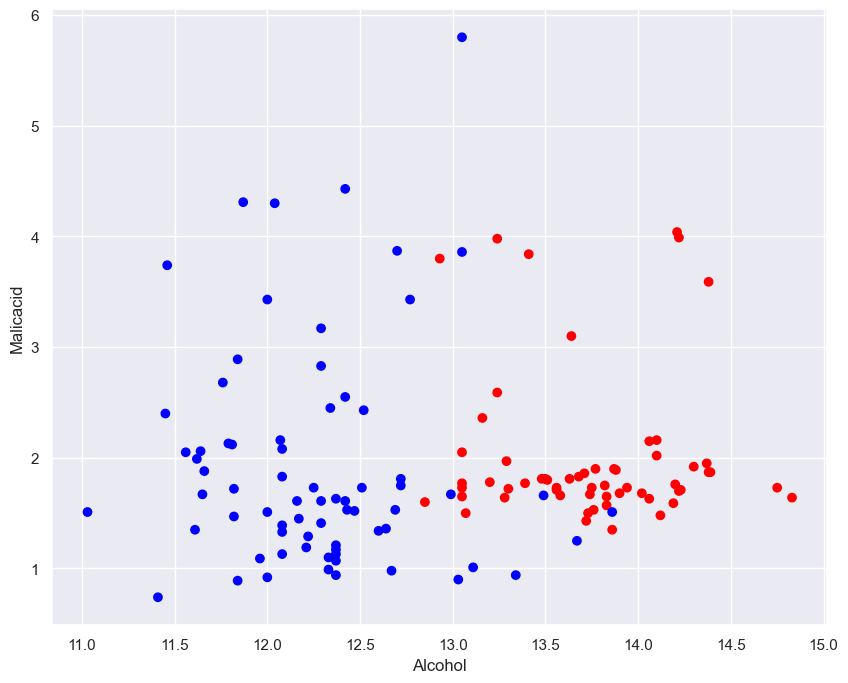

In [ ]:
filter=(df['class']==3)
df=df.loc[~filter]
color=['red' if label==1 else 'blue' for label in df['class']]

plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=color)
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()


In [ ]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

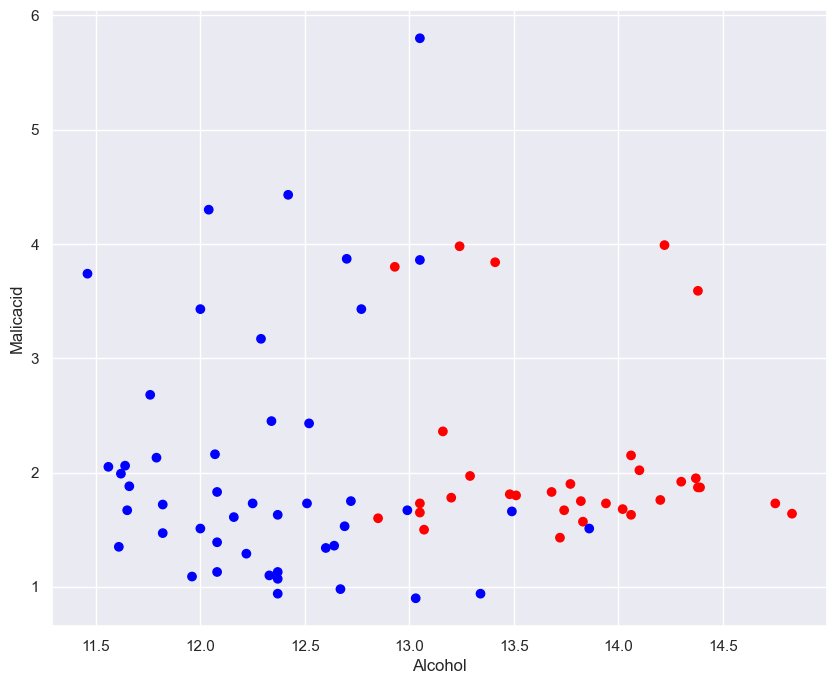

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=c_train)
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

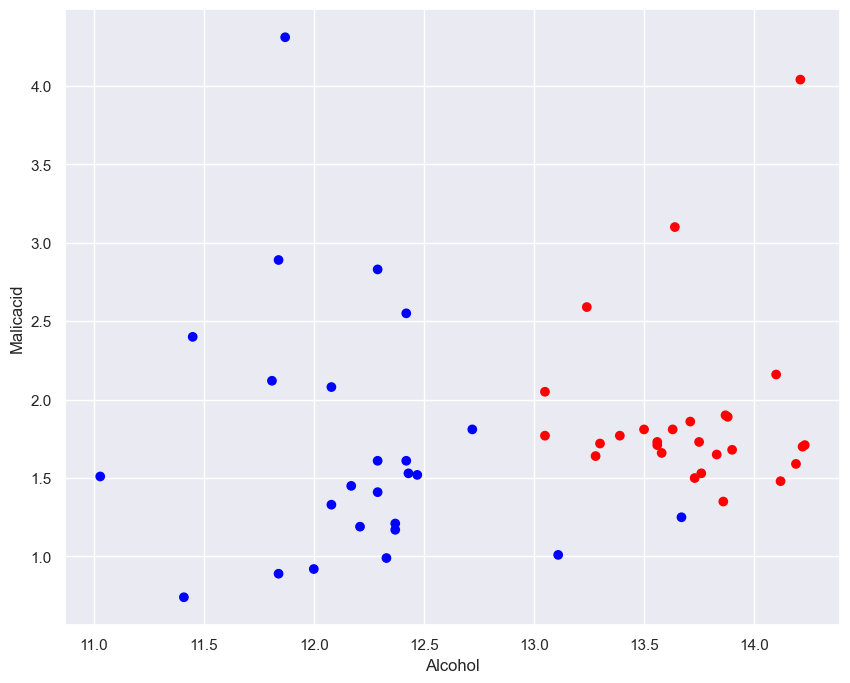

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=c_test)
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# use gini as the default
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42) # random_state is just a seed
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- Alcohol <= 12.81
|   |--- class: 2
|--- Alcohol >  12.81
|   |--- Malicacid <= 1.18
|   |   |--- class: 2
|   |--- Malicacid >  1.18
|   |   |--- Malicacid <= 4.90
|   |   |   |--- Malicacid <= 1.67
|   |   |   |   |--- Malicacid <= 1.65
|   |   |   |   |   |--- Alcohol <= 13.84
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Alcohol >  13.84
|   |   |   |   |   |   |--- Alcohol <= 13.96
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Alcohol >  13.96
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Malicacid >  1.65
|   |   |   |   |   |--- Alcohol <= 13.61
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Alcohol >  13.61
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Malicacid >  1.67
|   |   |   |   |--- Malicacid <= 3.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Malicacid >  3.85
|   |   |   |   |   |--- Malicacid <= 3.92
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Malicac

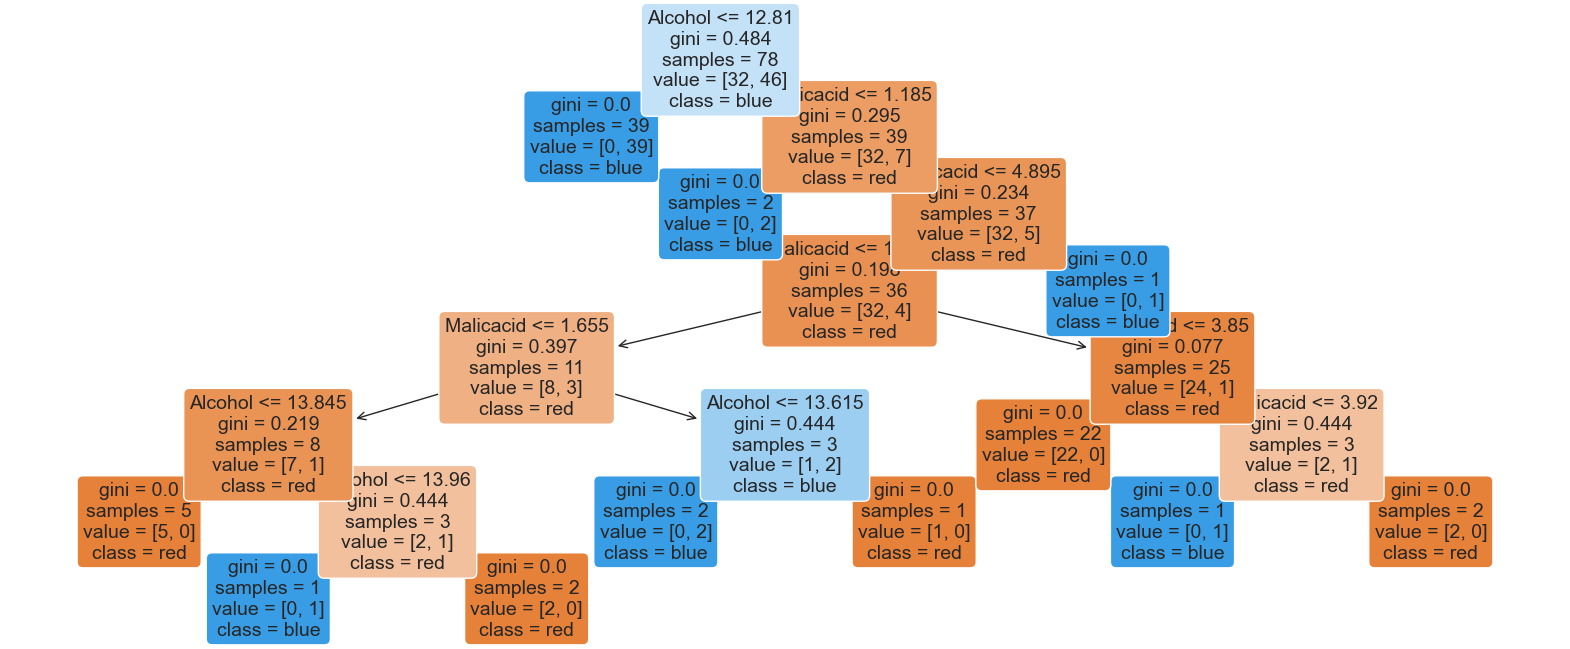

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ['Alcohol', 'Malicacid'])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ['Alcohol', 'Malicacid'],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

c:\Users\pangnaiwen\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


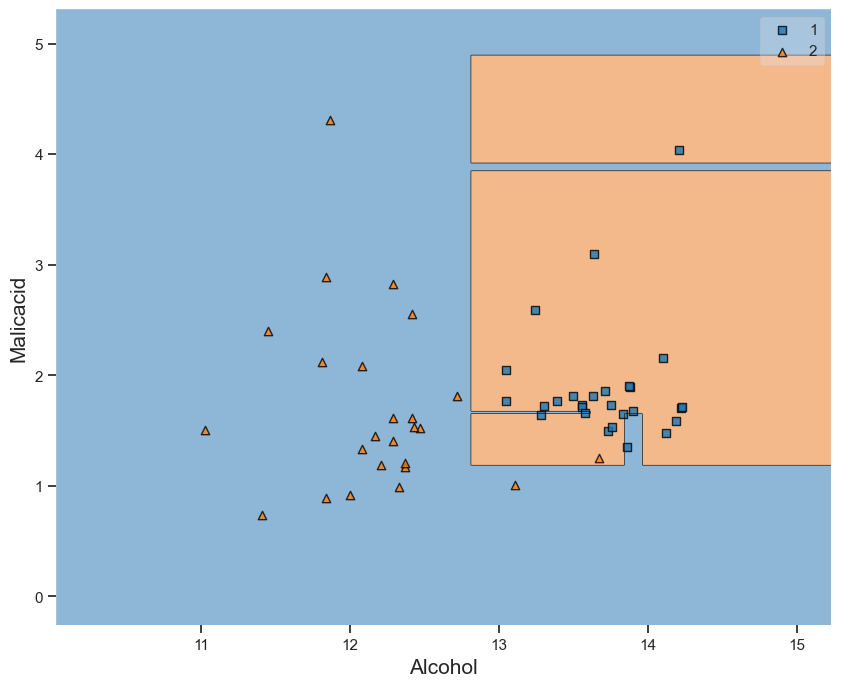

In [ ]:
X_test_np=X_test.to_numpy()
y_test_np=y_test.to_numpy()

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test_np, y_test_np, clf = decision_tree)
plt.xlabel('Alcohol', fontsize = 15)
plt.ylabel('Malicacid', fontsize = 15)
plt.grid()
plt.show()

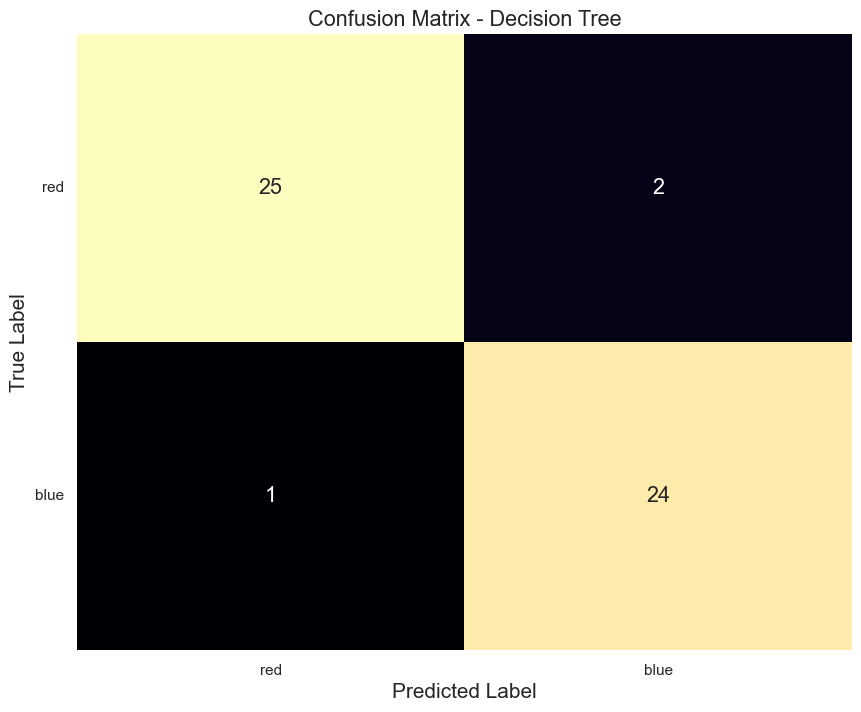

In [ ]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.94        27
           2       0.92      0.96      0.94        25

    accuracy                           0.94        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [ ]:
from sklearn.metrics import mean_squared_error

print(f"MSE decision_tree: {mean_squared_error(y_test, y_pred)} \n")

MSE decision_tree: 0.057692307692307696 



# Conclusion and Discussion

The model evaluation shows that Decision Tree is capable of predicting the category of wine with a very high accuracy. A summary of the results obtained is:

1. The Decision Tree is able to achieve a testing accuracy of 94%.
2. The Decision Tree of the percepron is 94% and 94% respectively for class 1 and class 2 wine.